# Part 1. Logistic regression intro

In [12]:
import scipy as sp
import scipy.linalg as spla
import scipy.optimize as spopt
import scipy.stats as spst

import numpy as np
import numpy.linalg as npla

import statsmodels as sm
import statsmodels.api as sma
smfOLS = sma.regression.linear_model.OLS.from_formula
smfLGT = sm.discrete.discrete_model.Logit.from_formula

import seaborn as sb
import pandas as pd

import matplotlib.pyplot as plt

from inspect import signature as sig

In [13]:
# matplotlib image size and resolution
mpl_options = {"figsize":(8,8), "dpi":100}
sb.set(rc={'figure.figsize':(8,8)})

### То understand the logistic regression, we need to understand where it came from. Typically we are trying to fit a line through a cloud of datapoints. The x variables can be continuous or discrete byt the y variable is always continuous.
### For example, "Income ~ Age + YearsEducation" или "LifeExpectancy ~ Income"

In [14]:
x=np.random.uniform(size=100)
x=x-x.mean()
eps=np.random.uniform(size=100)*2
eps=eps-eps.mean()

y = 3.45*x + eps

<AxesSubplot:>

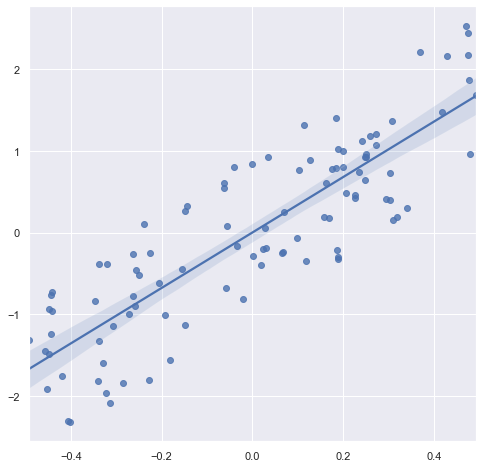

In [15]:
sb.regplot(x=x, y=y)

In [16]:
df = pd.DataFrame([])
df['Income']=x
df['Age']=y
model = smfOLS("Income ~ Age", data=df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           3.77e-30
Time:                        23:16:14   Log-Likelihood:                 51.490
No. Observations:                 100   AIC:                            -98.98
Df Residuals:                      98   BIC:                            -93.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.475e-16      0.015  -1.01e-14      1.000      -0.029       0.029
Age            0.2171      0.013     16.557      0.000       0.191       0.243
==============================================================================
Omnibus:                        5.664   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                2.705
Skew:                          -0.083   Prob(JB):                        0.259
Kurtosis:                       2.211   Cond. No.                         1.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What if the outcome variable is discrete, like "getting married". We could try

In [17]:
x=np.random.uniform(size=100)
x=x-x.mean()
eps=np.random.uniform(size=100)*2
eps=eps-eps.mean()

y = (np.sign(3.45*x + eps)+1)/2

<AxesSubplot:>

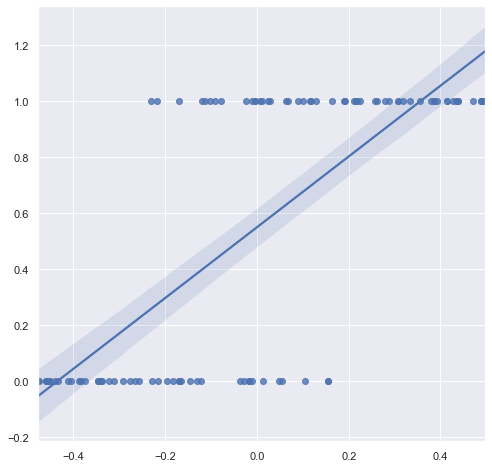

In [18]:
sb.regplot(x=x, y=y)

In [19]:
df = pd.DataFrame([])
df['Income']=x
df['Univ'] = y
model = smfOLS("Univ ~ Income", data=df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Univ   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     112.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           5.80e-18
Time:                        23:16:17   Log-Likelihood:                -33.840
No. Observations:                 100   AIC:                             71.68
Df Residuals:                      98   BIC:                             76.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5500      0.034     16.042      0.000       0.482       0.618
Income         1.2633      0.119     10.609      0.000       1.027       1.500
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.574
Skew:                           0.030   Prob(JB):                        0.751
Kurtosis:                       2.634   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Clearly, this is a very poor fitting/prediction exercise
### It would be great to have a model where
- the fitted values are between 0 and 1
- the optimization is convex
- could use covariates

<AxesSubplot:>

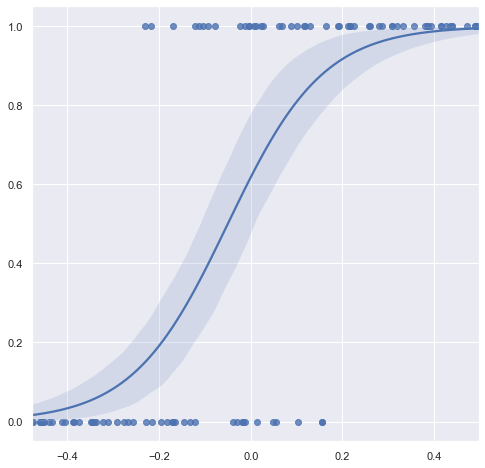

In [20]:
sb.regplot(x=x, y=y, logistic = True)

In [21]:
df = pd.DataFrame([])
df['Income']=x
df['Univ']=y
model = smfLGT("Univ ~ Income", data=df)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.341218
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Univ   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                  0.5041
Time:                        23:16:25   Log-Likelihood:                -34.122
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                 8.103e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4801      0.316      1.522      0.128      -0.138       1.098
Income         9.6120      1.861      5.166      0.000       5.965      13.259
==============================================================================
"""

### A classic interpretation of the regression is estimating a certain parameter of the distribution of $(X,Y)$, modeled in a particular functional form, which is computationally convenient and easy to interpret
- standard ols regression is linear in X conditional average: $$E[Y|X]=\beta' X$$
- logistic regression is "logistic" in X conditional probability: $$\mathbb{E}[I(Y=1)|X] = Pr(Y=1|X)=\frac{1}{1+\exp(-\beta' X)}$$

### Apart from being computationally feasible (back in 20 century) the $F(z)=\frac{1}{1+\exp(-z)}$ transformation has image in [0,1], and is monotone. While it is not immediately obvious, there exist simple joint distributions that give rise to such functional forms. Although people care less about it these days

### In fact, both the OLS and Logit are maximum likelihood estimators in respective econometric models
- classic ols is $$y_i = \beta x_i + \sigma \varepsilon, \quad \varepsilon \sim \mathcal{N}(0,1)$$ where you observe $x_i$, $y_i$.
- classic logit is $$y_i = \beta x_i + \sigma \varepsilon, \quad \varepsilon \sim Logistic$$ but you observe $x_i$, $I(y_i>0)$.

### A general theorem argues that MLE consistently estimates the parameters (betas): Abraham Wald, (1949), Note on the Consistency of the Maximum Likelihood Estimate, Ann. Math. Stat.

### We can verify the functional forms by hand:

- ols: $$\mathbb{E}[y_i|x_i] = \beta' x_i + \sigma \mathbb{E}[\varepsilon|x_i]=\beta' x_i$$
- logit: $$Pr(y_i=1) = \mathbb{E}[y_i>0|x_i] = \mathbb{E}[\varepsilon_i>(-\beta' x_i)/\sigma|x_i]=$$ 
$$= \mathbb{E}[-\tilde\varepsilon_i>(-\beta' x_i)/\sigma|x_i]= \mathbb{E}[\tilde\varepsilon_i<(\beta' x_i)/\sigma|x_i]=F(\beta' x_i/\sigma)$$
since $\tilde \varepsilon=-\varepsilon$ by symmetry

### We can verify the likelihoods
- ols: $$f_{nor}(\varepsilon)=\frac{1}{\sqrt{2 \pi}}\exp^{\frac{-\varepsilon^2}{2}} \quad \Rightarrow \quad \mathcal{LL}=\sum_{i=1}^n \frac{-\varepsilon_i^2}{2} + K = \frac{-1}{\sigma^2} \sum (y_i - \beta' x_i)^2 + K \to \max_{\beta, \sigma}$$
- logit: $$F_{log}(\varepsilon)=\frac{1}{1+\exp^{-\varepsilon}}=1-F_{log}(-\varepsilon) \quad \Rightarrow \quad \mathcal{L}=\prod F^{y_i}(\beta' x_i /\sigma) \cdot (1-F(\beta' x_i /\sigma))^{1-y_i}$$
$$ \mathcal{LL} = \sum_{y_i = 1} \log \frac{1}{1+\exp(-\beta' x_i /\sigma)} + \sum_{y_i = 0} \log \frac{\exp(-\beta' x_i /\sigma)}{1+\exp(-\beta' x_i /\sigma)} \to \max_{\beta, \sigma}$$
$$ \mathcal{LL} = \sum_{y_i = 1} \log \frac{1}{1+\exp(-\beta' x_i /\sigma)} + \sum_{y_i = 0} \log \frac{1}{1+\exp(\beta' x_i /\sigma)} \to \max_{\beta, \sigma}$$
- the latter is, in fact, the definition of logit
- there is one problem, however, that $\beta, \sigma$ are not jointly identified in the population
- if we add a constant into the regression, $\beta_0$ would be exactly equal to $1/\sigma$, so... always add a constant

### Time has come to assess convexity of the optimization problem. 
$$ \mathcal{LL} = \sum_{y_i = 0} (-\beta' x_i /\sigma) - \sum_{all} \log(1+\exp(-\beta' x_i /\sigma)) \to \max_{\beta}$$
### The thing is that $1+\exp(-z)$ is also log-concave, thus the log-likelihood (but not likeligood) is concave

## How about the regularization?

### If logit itself is convex, so it the regularization
- ols: $$ \quad Loss = \frac{1}{2n}\sum (y_i - \beta' x_i)^2 + a * ||w||_1 + b * \frac{||w||^2_2}{2} \to \min_{\beta}, \quad \text{where} \quad l1_{ratio} = \frac{a}{a+b}, \quad \alpha=a+b$$
- logit: $$ \quad Loss = \sum \log(1+\exp(-y_i \beta' x_i)) + a * ||w||_1 + b * \frac{||w||^2_2}{2} \to \min_{\beta}, \quad \text{where} \quad l1_{ratio} = \frac{a}{a+b}, \quad \alpha=a+b$$

### Warning!!! Here $y_i$ takes values $\{-1,1\}$, as is a tradition in CS. This can be confusing.
- CS  : $\mathcal{L}=\prod F^{\frac{1+y_i}{2}}(\beta' x_i /\sigma) \cdot (1-F(\beta' x_i /\sigma))^{\frac{1-y_i}{2}} = \prod F(y_i \cdot \beta' x_i /\sigma)$ and $y_i \in \{-1,1\}$
- ECON: $\mathcal{L}=\prod F^{y_i}(\beta' x_i /\sigma) \cdot (1-F(\beta' x_i /\sigma))^{1-y_i}$ and $y_i \in \{0,1\}$

### Assignment 1 (1 point): Prove the equivalence of the two approaches, that is, $\hat \beta$ would be the same if we redefine $y$

In [11]:
def OLS_loss(Y, X, beta, a, b):
    z = Y - X@beta
    return np.square(z).sum()/(2*Y.size) + a*np.abs(beta).sum() + b*np.square(beta).sum()/2

def LGT_loss(Y, X, beta, a, b):
    z = -Y*X@beta
    o = np.ones(Y.size)
    return np.logaddexp(o, z).sum() + a*np.abs(beta).sum() + b*np.square(beta).sum()/2

### Assignment 2 (1 point): Find and fix the error in the code above

### Lets try sklearn (that is part of CS community)

In [199]:
from sklearn.linear_model import Ridge as skRidge
from sklearn.linear_model import Lasso as skLasso
from sklearn.linear_model import ElasticNet as skEN

from sklearn.linear_model import LogisticRegression as skLGT

In [205]:
x=np.random.normal(size=1000)
eps=np.random.logistic(size=1000)

# careful here goes -1,1
y = np.sign(1 + 2*x + eps)
x = x.reshape(1000, 1)

In [206]:
# Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance
x.dtype, y.dtype

(dtype('float64'), dtype('float64'))

In [207]:
sig(skLGT)

<Signature (penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)>

In [208]:
#sk_options={'penalty':'elasticnet', 'solver':'saga', 
#            'fit_intercept':True, 'l1_ratio':1, 'C':1,
#            'verbose':1, 'n_jobs':10}
                    
sk_options = {}

In [209]:
model = skLGT(**sk_options).fit(x,y)
model.intercept_, model.coef_

(array([1.03119262]), array([[1.98947361]]))

### Lets try statsmodels (thats part of Econ community)

In [210]:
import statsmodels.formula.api as smf

In [211]:
yecon = (y+1)/2

In [213]:
data = np.hstack((x, yecon.reshape(1000, 1)))
data.shape

(1000, 2)

In [214]:
df = pd.DataFrame(data, columns = ['x', 'y'])
df.head()

,x,y
0,-0.897074,1.0
1,-0.485925,0.0
2,0.750426,1.0
3,-1.651639,0.0
4,1.604647,1.0


In [233]:
formula = 'y ~ x'
model = smf.logit(formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.430092
         Iterations 7


In [234]:
from inspect import signature
signature(smf.logit)

<Signature (formula, data, subset=None, drop_cols=None, *args, **kwargs)>

In [235]:
model.params

Intercept    1.041848
x            2.024607
dtype: float64

### Assignment 3 (3 point): Write your own logistic regression that replicates the output of the function below

In [254]:
def assignment_3(formula, data):
    model = smf.logit(formula, data=df).fit()
    return model.params
    
x = assignment_3('y ~ x', df)

Optimization terminated successfully.
         Current function value: 0.430092
         Iterations 7


In [255]:
x

Intercept    1.041848
x            2.024607
dtype: float64

### Average Marginal Effects
- ols $$\mathbb{E}_x[\frac{\mathbb{E}_{\varepsilon}[Y|X]}{\partial X}] = \mathbb{E}_x[\beta] = \beta$$
- logit $$\mathbb{E}_x[\frac{Prob_{\varepsilon}(Y=1|X)}{\partial X}] = \mathbb{E}_x[\frac{F(\beta' X)}{\partial X}] = \beta * \mathbb{E}_x[f(\beta' X)] \approx \frac{\beta}{n} \sum_{i=1}^n \frac{\exp^{-\beta' x_i}}{(1+\exp^{-\beta' x_i})^2}$$

### in ols local = average, but in logit local != average due to linearity. we always want average effects

### Assignment 4 (2 points): Write your own logistic regression with $\alpha$ and $l1ratio$ as parameters

### Assignment 5 (3 points): Write your own logistic regression with number of folds as parameter

### Assignment 6 (bonus 5 points): Write the ordered/latent/rand logit and compare to existing library

### Assignment 7 (bonus 5 points): Write confident Logit with crossvalidation for window size

### Comments for the HA
- deadline in 2 weeks
- this completes Test 1
- these are fully individual tasks, no cheating, please. 
- confirmed cheating will halve your grade.
- test your results against a simulation
- use markdowns to explain what you are doing
- for each task, make a main() function with an intuitive interface
- 2 groups is enough for "confident" logit
- 3 groups is enough for "ordered" logit